# Speech Emotion Recognition

The objective of this notebook is to classify from raw sound waves to six emotions: happy, sad, neutral, fear, angry, and disgust. 

1. Gathering data
2. Quick EDA
3. Preprocess
4. Extract features
5. Build a LSTM
6. Evaluate and conclude

Datasets:
* Crowd-sourced Emotional Multimodal Actors Dataset (Crema-D)
* Ryerson Audio-Visual Database of Emotional Speech and Song (Ravdess)
* Surrey Audio-Visual Expressed Emotion (Savee)
* Toronto Emotional Speech Set (Tessa)

# 1. Gathering data

We will gather speech data from four datasets and store it in a single dataframe along with the corresponding file paths, gender labels and emotion labels. The size of each respective dataframe will be specified, along with an example filename in which the emotion label is bolded. 

In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
RAVDESS = "Datasets/RAVDESS/audio_speech_actors_01-24/"
CREMA = "Datasets/CREMA_D/AudioWAV/"
TESS = "Datasets/TESS/TESS Toronto emotional speech set data/"
SAVEE = "Datasets/SAVEE/ALL/"

**1. Ravdess Dataframe**

There are 1440 audio files, for example, 03-01-**06**-01-02-01-12.wav.

In [3]:
ravdess_dir_lis = os.listdir(RAVDESS)
path_list = []
gender_list = []
emotion_list = []

emotion_dic = {
    '03' : 'happy',
    '01' : 'neutral',
    '04' : 'sad',
    '05' : 'angry',
    '06' : 'fear',
    '07' : 'disgust',
}

for directory in ravdess_dir_lis:
    actor_files = os.listdir(os.path.join(RAVDESS, directory))
    for audio_file in actor_files: 
        part = audio_file.split('.')[0]
        key = part.split('-')[2]
        if key in emotion_dic:
            gender_code = int(part.split('-')[6])
            path_list.append(f"{RAVDESS}{directory}/{audio_file}")
            gender_list.append('female' if gender_code & 1 == 0 else 'male')
            emotion_list.append(emotion_dic[key])
            
ravdess_df = pd.concat([
    pd.DataFrame(path_list, columns=['path']),
    pd.DataFrame(gender_list, columns=['sex']),
    pd.DataFrame(emotion_list, columns=['emotion'])
], axis=1)

ravdess_df.head()

,path,sex,emotion
0,Datasets/RAVDESS/audio_speech_actors_01-24/Act...,female,disgust
1,Datasets/RAVDESS/audio_speech_actors_01-24/Act...,female,sad
2,Datasets/RAVDESS/audio_speech_actors_01-24/Act...,female,sad
3,Datasets/RAVDESS/audio_speech_actors_01-24/Act...,female,sad
4,Datasets/RAVDESS/audio_speech_actors_01-24/Act...,female,happy


**2. Crema-D Dataframe**

There are 7,442 audio files, for example, 1001_DFA_**ANG**_XX.wav.

In [4]:
crema_dir_list = os.listdir(CREMA)
path_list = []
gender_list = []
emotion_list = []

emotion_dic = {
    'HAP' : 'happy',
    'NEU' : 'neutral',
    'SAD' : 'sad',
    'ANG' : 'angry',
    'FEA' : 'fear',
    'DIS' : 'disgust',
}

female_id_list = [
    '1002', '1003', '1004', '1006', '1007', '1008', '1009', '1010', '1012', '1013', '1018', 
    '1020', '1021', '1024', '1025', '1028', '1029', '1030', '1037', '1043', '1046', '1047', 
    '1049', '1052', '1053', '1054', '1055', '1056', '1058', '1060', '1061', '1063', '1072', 
    '1073', '1074', '1075', '1076', '1078', '1079', '1082', '1084', '1089', '1091',
]

for audio_file in crema_dir_list:
    part = audio_file.split('_')
    key = part[2]
    if key in emotion_dic and part[3] == 'HI.wav':
        path_list.append(f"{CREMA}{audio_file}")
        gender_list.append('female' if part[0] in female_id_list else 'male')
        emotion_list.append(emotion_dic[key])

crema_df = pd.concat([
    pd.DataFrame(path_list, columns=['path']),
    pd.DataFrame(gender_list, columns=['sex']),
    pd.DataFrame(emotion_list, columns=['emotion'])
], axis=1)

crema_df.head()

,path,sex,emotion
0,Datasets/CREMA_D/AudioWAV/1070_IEO_HAP_HI.wav,male,happy
1,Datasets/CREMA_D/AudioWAV/1065_IEO_DIS_HI.wav,male,disgust
2,Datasets/CREMA_D/AudioWAV/1047_IEO_ANG_HI.wav,female,angry
3,Datasets/CREMA_D/AudioWAV/1067_IEO_SAD_HI.wav,male,sad
4,Datasets/CREMA_D/AudioWAV/1018_IEO_DIS_HI.wav,female,disgust


**3. Tess Dataframe**

There are 2,800 audio files, for example, OAF_base_**fear**.wav.

In [5]:
tess_dir_list = os.listdir(TESS)
path_list = []
gender_list = []
emotion_list = [] 

emotion_dic = {
    'happy'   : 'happy',
    'neutral' : 'neutral',
    'sad'     : 'sad',
    'Sad'     : 'sad',
    'angry'   : 'angry',
    'fear'    : 'fear',
    'disgust'  : 'disgust',
}

for directory in tess_dir_list:
    audio_files = os.listdir(os.path.join(TESS, directory))
    for audio_file in audio_files:
        part = audio_file.split('.')[0]
        key = part.split('_')[2]
        if key in emotion_dic:
            path_list.append(f"{TESS}{directory}/{audio_file}") 
            gender_list.append('female') # female only dataset
            emotion_list.append(emotion_dic[key])
            
tess_df = pd.concat([
    pd.DataFrame(path_list, columns=['path']),
    pd.DataFrame(gender_list, columns=['sex']),
    pd.DataFrame(emotion_list, columns=['emotion'])
], axis=1)

tess_df.head()

,path,sex,emotion
0,Datasets/TESS/TESS Toronto emotional speech se...,female,disgust
1,Datasets/TESS/TESS Toronto emotional speech se...,female,disgust
2,Datasets/TESS/TESS Toronto emotional speech se...,female,disgust
3,Datasets/TESS/TESS Toronto emotional speech se...,female,disgust
4,Datasets/TESS/TESS Toronto emotional speech se...,female,disgust


**4. Savee Dataframe**

There are 480 audio files, for example, DC_**a**02.wav.

In [6]:
savee_dir_list = os.listdir(SAVEE)
path_list = []
gender_list = []
emotion_list = []

emotion_dic = {
    'h'  : 'happy',
    'n'  : 'neutral',
    'sa' : 'sad',
    'a'  : 'angry',
    'f'  : 'fear',
    'd'  : 'disgust'
}

for audio_file in savee_dir_list:
    part = audio_file.split('_')[1]
    key = part[:-6]
    if key in emotion_dic:
        path_list.append(f"{SAVEE}{audio_file}")
        gender_list.append('male') # male only dataset
        emotion_list.append(emotion_dic[key])
        
savee_df = pd.concat([
    pd.DataFrame(path_list, columns=['path']),
    pd.DataFrame(gender_list, columns=['sex']),
    pd.DataFrame(emotion_list, columns=['emotion'])
], axis=1)

savee_df.head()

,path,sex,emotion
0,Datasets/SAVEE/ALL/DC_n06.wav,male,neutral
1,Datasets/SAVEE/ALL/JK_sa13.wav,male,sad
2,Datasets/SAVEE/ALL/JE_sa14.wav,male,sad
3,Datasets/SAVEE/ALL/JE_a15.wav,male,angry
4,Datasets/SAVEE/ALL/DC_a04.wav,male,angry


In [7]:
df = pd.concat([
    ravdess_df, 
    crema_df, 
    tess_df, 
    savee_df
], axis=0)
df.head()

,path,sex,emotion
0,Datasets/RAVDESS/audio_speech_actors_01-24/Act...,female,disgust
1,Datasets/RAVDESS/audio_speech_actors_01-24/Act...,female,sad
2,Datasets/RAVDESS/audio_speech_actors_01-24/Act...,female,sad
3,Datasets/RAVDESS/audio_speech_actors_01-24/Act...,female,sad
4,Datasets/RAVDESS/audio_speech_actors_01-24/Act...,female,happy


# 2. Quick EDA

We check for imbalances like male to female ratio. 

In [8]:
import librosa
import matplotlib.pyplot as plt

plt.style.use('ggplot')

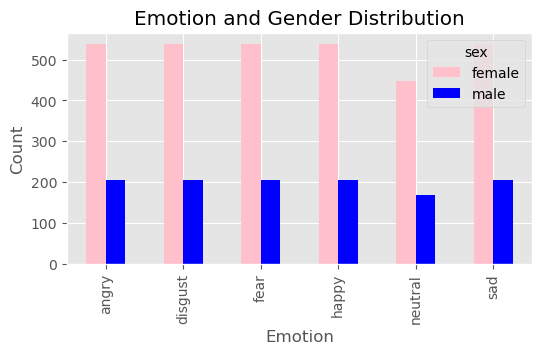

In [9]:
def plot_distribution(df): 
    countTable = df.groupby(['emotion', 'sex']).count()
    pivotTable = countTable.pivot_table(index='emotion', columns='sex', values='path')

    pivotTable.plot(kind='bar', figsize=(6, 3), color=['pink', 'blue'])
    plt.title('Emotion and Gender Distribution')
    plt.xlabel('Emotion')
    plt.ylabel('Count')
    plt.show()
    
plot_distribution(df)

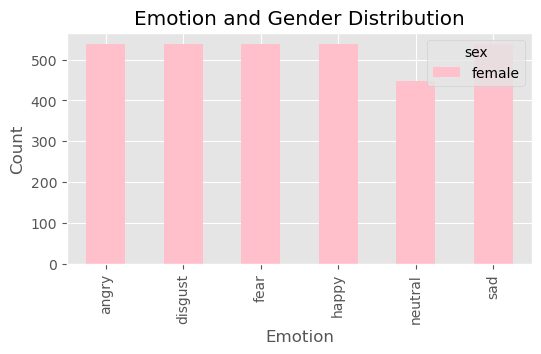

In [10]:
# I decided to go with a female specific model 
df = df[df['sex'] == 'female']
plot_distribution(df)

In [11]:
df.drop('sex', axis=1, inplace=True)
df.head()

,path,emotion
0,Datasets/RAVDESS/audio_speech_actors_01-24/Act...,disgust
1,Datasets/RAVDESS/audio_speech_actors_01-24/Act...,sad
2,Datasets/RAVDESS/audio_speech_actors_01-24/Act...,sad
3,Datasets/RAVDESS/audio_speech_actors_01-24/Act...,sad
4,Datasets/RAVDESS/audio_speech_actors_01-24/Act...,happy


In [12]:
from IPython.display import Audio

def create_waveplot(y, sr, title):
    plt.figure(figsize=(8, 2))
    plt.title(title)
    librosa.display.waveshow(y, sr=sr)
    plt.show()

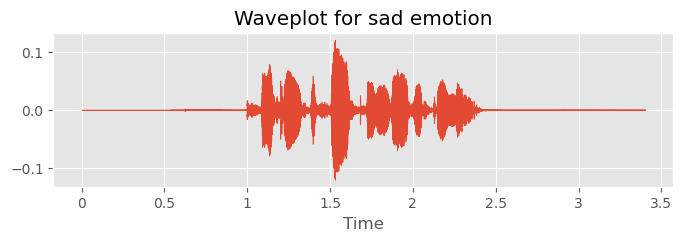

In [13]:
emotion_label = 'sad'
title = f"Waveplot for {emotion_label} emotion"
path = np.array(df.path[df.emotion == emotion_label])[1]
y, sr = librosa.load(path)

create_waveplot(y, sr, title)
Audio(path)

# 3. Preprocess

The following steps will be followed to preprocess the audio: 

1. Get an array of samples
2. Trim the silence  
3. Padding for equal length

In [14]:
pip install pydub

Note: you may need to restart the kernel to use updated packages.


In [15]:
from pydub import AudioSegment, effects

/home/student/anaconda3/lib/python3.11/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [16]:
def preprocess_audio(path):
    _, sr = librosa.load(path)
    raw_audio = AudioSegment.from_file(path)
    
    samples = np.array(raw_audio.get_array_of_samples(), dtype='float32')
    trimmed, _ = librosa.effects.trim(samples, top_db=25)
    padded = np.pad(trimmed, (0, 180000-len(trimmed)), 'constant')
    return padded, sr

In [17]:
emotion_dic = {
    'neutral' : 0,
    'happy'   : 1,
    'sad'     : 2, 
    'angry'   : 3, 
    'fear'    : 4, 
    'disgust' : 5
}

def encode(label):
    return emotion_dic.get(label)

# 4. Extract features

We will only extract these features: 

1. Mel-Frequency Cepstral Coefficients: captures the shape of the spectral envelope of a signal
2. Zero Crossing Rate: captures the number of times a signal changes sign per second
3. Root Mean Square Energy: captures the root mean square amplitude of the audio signal

In [18]:
zcr_list = []
rms_list = []
mfccs_list = []
emotion_list = []

FRAME_LENGTH = 2048
HOP_LENGTH = 512

for row in df.itertuples(index=False):
    try: 
        y, sr = preprocess_audio(row.path)

        zcr = librosa.feature.zero_crossing_rate(y, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)
        rms = librosa.feature.rms(y=y, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13, hop_length=HOP_LENGTH)

        zcr_list.append(zcr)
        rms_list.append(rms)
        mfccs_list.append(mfccs)

        emotion_list.append(encode(row.emotion))
    except:
        print(f"Failed for path: {row.path}")

Failed for path: Datasets/RAVDESS/audio_speech_actors_01-24/Actor_20/03-01-06-01-01-02-20.wav


/home/student/anaconda3/lib/python3.11/site-packages/pydub/utils.py:198: RuntimeWarning: Couldn't find ffprobe or avprobe - defaulting to ffprobe, but may not work
  warn("Couldn't find ffprobe or avprobe - defaulting to ffprobe, but may not work", RuntimeWarning)


Failed for path: Datasets/TESS/TESS Toronto emotional speech set data/YAF_angry/YAF_germ_angry.wav


/home/student/anaconda3/lib/python3.11/site-packages/pydub/utils.py:198: RuntimeWarning: Couldn't find ffprobe or avprobe - defaulting to ffprobe, but may not work
  warn("Couldn't find ffprobe or avprobe - defaulting to ffprobe, but may not work", RuntimeWarning)


Failed for path: Datasets/TESS/TESS Toronto emotional speech set data/YAF_fear/YAF_neat_fear.wav


In [19]:
from tqdm import tqdm

zcr_list = []
rms_list = []
mfccs_list = []
emotion_list = []

FRAME_LENGTH = 2048
HOP_LENGTH = 512

# Use tqdm to display a progress bar
for row in tqdm(df.itertuples(index=False), total=len(df), desc="Processing Audio Features"):
    try:
        y, sr = preprocess_audio(row.path)

        zcr = librosa.feature.zero_crossing_rate(y, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)
        rms = librosa.feature.rms(y=y, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13, hop_length=HOP_LENGTH)

        zcr_list.append(zcr)
        rms_list.append(rms)
        mfccs_list.append(mfccs)

        emotion_list.append(encode(row.emotion))
    except Exception as e:
        print(f"Failed for path: {row.path}, Error: {e}")

# Now zcr_list, rms_list, mfccs_list, and emotion_list should contain the extracted features


Processing Audio Features:   9%|▉         | 278/3143 [00:07<01:13, 38.73it/s]

Failed for path: Datasets/RAVDESS/audio_speech_actors_01-24/Actor_20/03-01-06-01-01-02-20.wav, Error: index can't contain negative values


Processing Audio Features:  35%|███▌      | 1113/3143 [00:24<00:39, 50.80it/s]/home/student/anaconda3/lib/python3.11/site-packages/pydub/utils.py:198: RuntimeWarning: Couldn't find ffprobe or avprobe - defaulting to ffprobe, but may not work
  warn("Couldn't find ffprobe or avprobe - defaulting to ffprobe, but may not work", RuntimeWarning)
Processing Audio Features:  36%|███▌      | 1119/3143 [00:24<00:39, 50.83it/s]

Failed for path: Datasets/TESS/TESS Toronto emotional speech set data/YAF_angry/YAF_germ_angry.wav, Error: [Errno 2] No such file or directory: 'ffprobe'


Processing Audio Features:  53%|█████▎    | 1659/3143 [00:34<00:26, 55.74it/s]/home/student/anaconda3/lib/python3.11/site-packages/pydub/utils.py:198: RuntimeWarning: Couldn't find ffprobe or avprobe - defaulting to ffprobe, but may not work
  warn("Couldn't find ffprobe or avprobe - defaulting to ffprobe, but may not work", RuntimeWarning)
Processing Audio Features:  53%|█████▎    | 1672/3143 [00:34<00:25, 57.20it/s]

Failed for path: Datasets/TESS/TESS Toronto emotional speech set data/YAF_fear/YAF_neat_fear.wav, Error: [Errno 2] No such file or directory: 'ffprobe'


Processing Audio Features: 100%|██████████| 3143/3143 [01:02<00:00, 50.41it/s]


In [20]:
X = np.concatenate((
    np.swapaxes(zcr_list, 1, 2), 
    np.swapaxes(rms_list, 1, 2), 
    np.swapaxes(mfccs_list, 1, 2)), 
    axis=2
)
X = X.astype('float32')

y = np.asarray(emotion_list)
y = np.expand_dims(y, axis=1).astype('int8')

# 5. Build a LSTM

Before building the model, we will have to setup the data. LSTM are great for sequences.  

In [21]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

2023-12-10 22:11:58.270988: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-10 22:11:58.532718: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-10 22:11:58.532761: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-10 22:11:58.582363: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-10 22:11:58.697157: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-10 22:11:58.698348: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [51]:
X_train, X_to_split, y_train, y_to_split = train_test_split(X, y, test_size=0.12, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_to_split, y_to_split, test_size=0.3, random_state=1)

y_train_class = to_categorical(y_train, 6)
y_val_class = to_categorical(y_val, 6)

In [23]:
from keras.models import Sequential
from keras import layers, optimizers, callbacks

In [24]:
MODEL = Sequential()
MODEL.add(layers.LSTM(64, return_sequences=True, input_shape=(X.shape[1:3])))
MODEL.add(layers.LSTM(64))
MODEL.add(layers.Dense(6, activation='softmax'))

print(MODEL.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 352, 64)           20480     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 6)                 390       
                                                                 
Total params: 53894 (210.52 KB)
Trainable params: 53894 (210.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

# Your model definition
MODEL = Sequential()
MODEL.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
MODEL.add(Dense(y_train_class.shape[1], activation='softmax'))  # Assuming y_train_class is one-hot encoded
MODEL.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['categorical_accuracy'])

# Define callbacks
rlrop = ReduceLROnPlateau(monitor='val_categorical_accuracy', factor=0.01, patience=100)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_categorical_accuracy', save_best_only=True)

# Train the model with callbacks
model = MODEL.fit(X_train, y_train_class, epochs=50, batch_size=6, validation_data=(X_val, y_val_class), callbacks=[rlrop, model_checkpoint])


Epoch 1/50
461/461 [==============================] - 20s 41ms/step - loss: 1.6454 - categorical_accuracy: 0.2979 - val_loss: 1.5268 - val_categorical_accuracy: 0.2852 - lr: 0.0010
Epoch 2/50
461/461 [==============================] - 19s 40ms/step - loss: 1.4333 - categorical_accuracy: 0.4090 - val_loss: 1.3981 - val_categorical_accuracy: 0.3764 - lr: 0.0010
Epoch 3/50
461/461 [==============================] - 18s 40ms/step - loss: 1.2902 - categorical_accuracy: 0.4796 - val_loss: 1.4781 - val_categorical_accuracy: 0.3954 - lr: 0.0010
Epoch 4/50
461/461 [==============================] - 18s 40ms/step - loss: 1.2123 - categorical_accuracy: 0.5204 - val_loss: 1.1479 - val_categorical_accuracy: 0.5779 - lr: 0.0010
Epoch 5/50
461/461 [==============================] - 18s 40ms/step - loss: 1.1210 - categorical_accuracy: 0.5726 - val_loss: 1.1364 - val_categorical_accuracy: 0.5741 - lr: 0.0010
Epoch 6/50
461/461 [==============================] - 19s 40ms/step - loss: 1.0944 - categorica

461/461 [==============================] - 19s 42ms/step - loss: 0.4518 - categorical_accuracy: 0.8455 - val_loss: 0.5392 - val_categorical_accuracy: 0.8175 - lr: 0.0010
Epoch 47/50
461/461 [==============================] - 19s 40ms/step - loss: 0.4362 - categorical_accuracy: 0.8469 - val_loss: 0.6312 - val_categorical_accuracy: 0.8099 - lr: 0.0010
Epoch 48/50
461/461 [==============================] - 19s 41ms/step - loss: 0.4487 - categorical_accuracy: 0.8480 - val_loss: 0.7190 - val_categorical_accuracy: 0.7909 - lr: 0.0010
Epoch 49/50
461/461 [==============================] - 19s 40ms/step - loss: 0.4603 - categorical_accuracy: 0.8408 - val_loss: 0.6371 - val_categorical_accuracy: 0.7985 - lr: 0.0010
Epoch 50/50
461/461 [==============================] - 19s 41ms/step - loss: 0.4485 - categorical_accuracy: 0.8505 - val_loss: 0.4742 - val_categorical_accuracy: 0.8327 - lr: 0.0010


# 6. Evaluate and conclude

Let's see how good are model is. 

In [39]:
from sklearn.metrics import confusion_matrix

In [42]:
model=load_model('best_model.h5')

In [44]:
validation_loss, validation_accuracy = model.evaluate(X_val, y_val_class, verbose=0)

# Print the accuracy
print("Validation Accuracy:", validation_accuracy)


Validation Accuracy: 0.8441064357757568


In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('best_model.h5')

# Assuming X_val and y_val_class are your validation data
y_pred = np.argmax(loaded_model.predict(X_val), axis=1)
y_true_classes = np.argmax(y_val_class, axis=1)

# Get classification report
class_report = classification_report(y_true_classes, y_pred, target_names=labels)

# Print the classification report
print(class_report)



9/9 [==============================] - 0s 22ms/step
              precision    recall  f1-score   support

     neutral       0.89      0.86      0.87        36
        calm       0.84      0.84      0.84        50
         sad       0.84      0.82      0.83        45
       happy       0.80      0.89      0.84        45
        fear       0.88      0.86      0.87        42
     disgust       0.84      0.80      0.82        45

    accuracy                           0.84       263
   macro avg       0.85      0.84      0.85       263
weighted avg       0.85      0.84      0.84       263



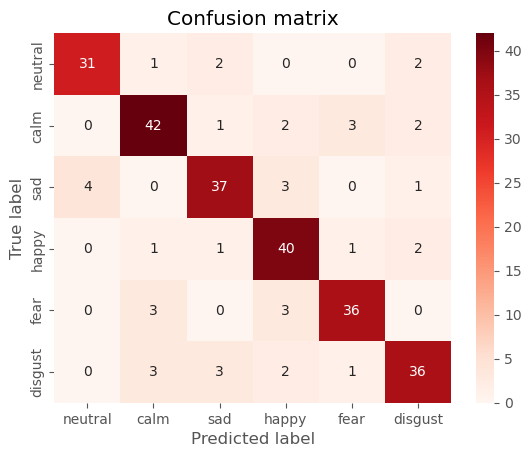

In [61]:
# Plot confusion matrix
cm = confusion_matrix(y_true_classes, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix')
plt.show()


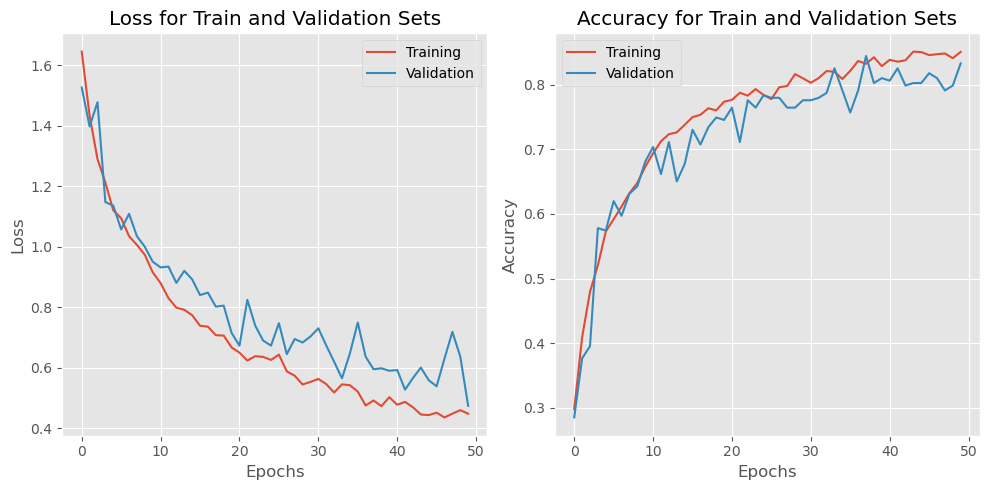

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].plot(model.history['loss'])
axes[0].plot(model.history['val_loss'])
axes[0].set_title('Loss for Train and Validation Sets')
axes[0].set_ylabel('Loss')
axes[0].set_xlabel('Epochs')
axes[0].legend(['Training', 'Validation'])

axes[1].plot(model.history['categorical_accuracy'])
axes[1].plot(model.history['val_categorical_accuracy'])
axes[1].set_title('Accuracy for Train and Validation Sets')
axes[1].set_ylabel('Accuracy')
axes[1].set_xlabel('Epochs')
axes[1].legend(['Training', 'Validation'])

fig.tight_layout()

plt.show()